In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Provide the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/xdr_data.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [6]:
# Top 10 handsets
handset_counts = data['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:\n", handset_counts)


Top 10 Handsets:
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [7]:
# Top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Manufacturers:\n", top_3_manufacturers)


Top 3 Manufacturers:
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [8]:
# Top 5 handsets per top 3 manufacturers
top_5_handsets = data[data['Handset Manufacturer'].isin(top_3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_5_handsets.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print("Top 5 Handsets per Manufacturer:\n", top_5_handsets_per_manufacturer)


Top 5 Handsets per Manufacturer:
 Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G

In [9]:
# Task 1.1 - User Behavior Aggregation
user_data = data.groupby('IMEI').agg(
    number_of_sessions=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    social_media_DL=('Social Media DL (Bytes)', 'sum'),
    social_media_UL=('Social Media UL (Bytes)', 'sum'),
    google_DL=('Google DL (Bytes)', 'sum'),
    google_UL=('Google UL (Bytes)', 'sum'),
    youtube_DL=('Youtube DL (Bytes)', 'sum'),
    youtube_UL=('Youtube UL (Bytes)', 'sum'),
    netflix_DL=('Netflix DL (Bytes)', 'sum'),
    netflix_UL=('Netflix UL (Bytes)', 'sum'),
    gaming_DL=('Gaming DL (Bytes)', 'sum'),
    gaming_UL=('Gaming UL (Bytes)', 'sum')
).reset_index()


In [10]:
# Calculate Total Data Volume and Average Speeds
user_data['total_data_volume'] = user_data['total_download_data'] + user_data['total_upload_data']
user_data['average_DL_speed'] = user_data['total_download_data'] / user_data['total_duration']
user_data['average_UL_speed'] = user_data['total_upload_data'] / user_data['total_duration']


In [11]:
# Total data volume per application
user_data['total_social_media'] = user_data['social_media_DL'] + user_data['social_media_UL']
user_data['total_google'] = user_data['google_DL'] + user_data['google_UL']
user_data['total_youtube'] = user_data['youtube_DL'] + user_data['youtube_UL']
user_data['total_netflix'] = user_data['netflix_DL'] + user_data['netflix_UL']
user_data['total_gaming'] = user_data['gaming_DL'] + user_data['gaming_UL']


In [12]:
# Task 1.2 - Exploratory Data Analysis (EDA)
# Handling Missing Values
user_data.fillna(user_data.mean(), inplace=True)


In [13]:
# Decile Segmentation based on Duration
user_data['duration_decile'] = pd.qcut(user_data['total_duration'], 10, labels=False)


In [14]:
# Decile Summary
decile_summary = user_data.groupby('duration_decile').agg(
    total_data_volume=('total_data_volume', 'sum')
)
print("Total Data per Decile:\n", decile_summary)


Total Data per Decile:
                  total_data_volume
duration_decile                   
0                     5.457884e+12
1                     6.105586e+12
2                     6.553060e+12
3                     6.179916e+12
4                     5.068734e+12
5                     6.453892e+12
6                     6.174791e+12
7                     7.843768e+12
8                     9.329748e+12
9                     1.491499e+13


In [15]:
# Univariate Analysis (Non-Graphical)
summary_stats = user_data.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                IMEI  number_of_sessions  total_duration  total_download_data  \
count  1.072700e+05       107270.000000    1.072700e+05         1.072700e+05   
mean   4.719099e+13            1.389009    1.459274e+05         6.333344e+08   
std    2.175666e+13            0.809475    1.863404e+05         4.643530e+08   
min    4.400152e+11            0.000000    7.142000e+03         8.827082e+06   
25%    3.543831e+13            1.000000    7.040425e+04         3.147901e+08   
50%    3.569811e+13            1.000000    1.024485e+05         5.700119e+08   
75%    3.594921e+13            2.000000    1.727990e+05         8.070103e+08   
max    9.900120e+13           18.000000    1.855375e+07         8.156743e+09   

       total_upload_data  social_media_DL  social_media_UL     google_DL  \
count       1.072700e+05     1.072700e+05    107270.000000  1.072700e+05   
mean        5.728149e+07     2.500812e+06     45864.730232  8.011603e+06   
std         3.564029e+07     1

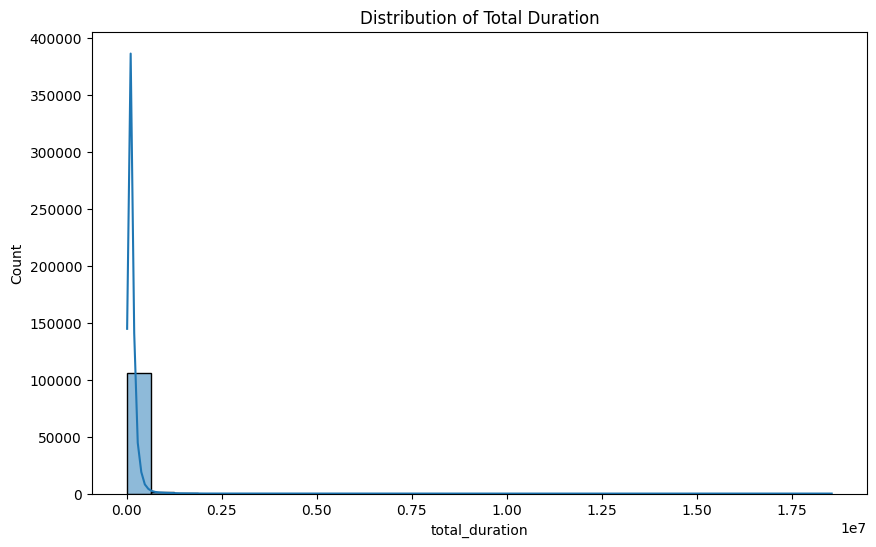

In [16]:
# Graphical Analysis
plt.figure(figsize=(10, 6))
sns.histplot(user_data['total_duration'], bins=30, kde=True)
plt.title('Distribution of Total Duration')
plt.show()

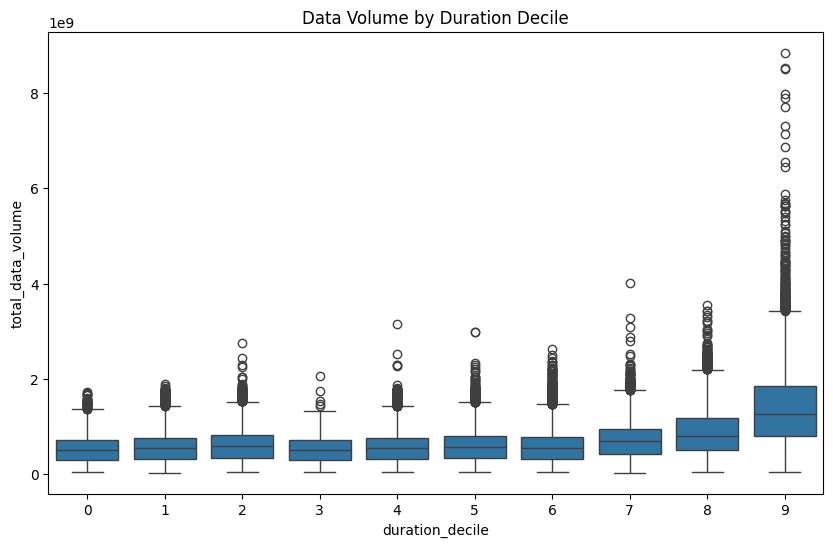

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_decile', y='total_data_volume', data=user_data)
plt.title('Data Volume by Duration Decile')
plt.show()

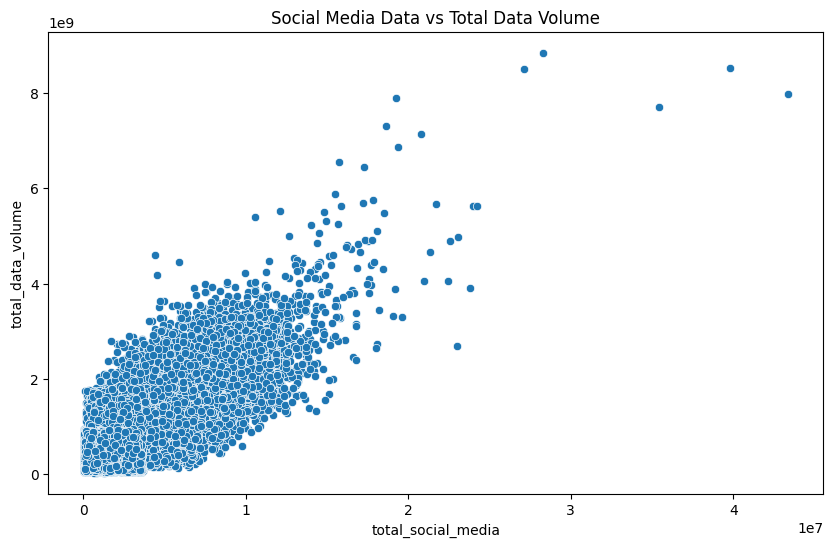

In [18]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_social_media', y='total_data_volume', data=user_data)
plt.title('Social Media Data vs Total Data Volume')
plt.show()


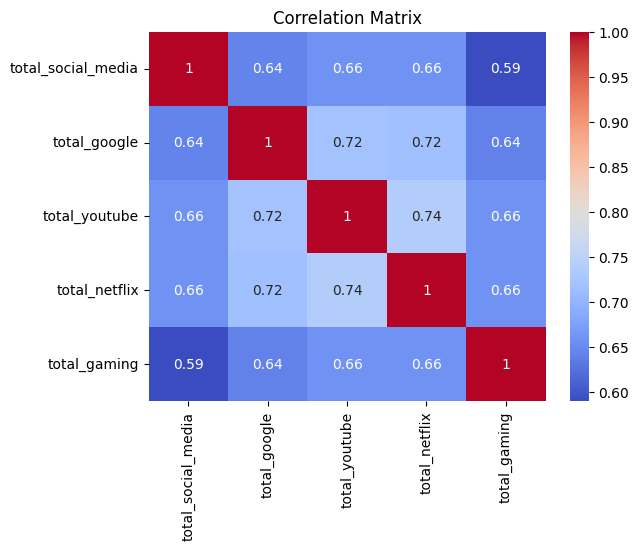

In [19]:
# Correlation Analysis
correlation_matrix = user_data[['total_social_media', 'total_google', 'total_youtube', 'total_netflix', 'total_gaming']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


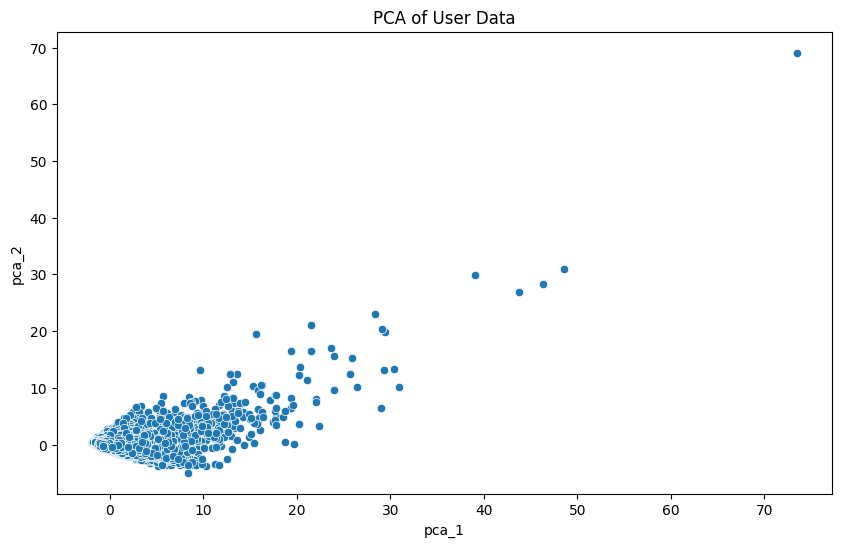

In [20]:
# Principal Component Analysis (PCA)
features = user_data[['total_download_data', 'total_upload_data', 'total_duration']]
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

user_data['pca_1'] = pca_result[:, 0]
user_data['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', data=user_data)
plt.title('PCA of User Data')
plt.show()

# TASK-2

In [56]:
# Check column names in the data
print(data.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [67]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame containing the telecom data

# Task 2.1 - Aggregate the metrics per customer ID (MSISDN)
# Aggregate sessions frequency and total session duration
engagement_data = data.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),  # Count of sessions per user
    total_session_duration=('Dur. (ms)', 'sum')  # Sum of session durations per user
).reset_index()


In [68]:
# Calculate the total traffic by summing 'Total DL (Bytes)' and 'Total UL (Bytes)'
total_dl_traffic = data.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
total_ul_traffic = data.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()


In [69]:
# Combine the download and upload traffic into one column
engagement_data['total_traffic'] = total_dl_traffic + total_ul_traffic


In [70]:
# Display the top 10 customers for each engagement metric
top_10_sessions_frequency = engagement_data[['MSISDN/Number', 'sessions_frequency']].sort_values(by='sessions_frequency', ascending=False).head(10)
top_10_total_session_duration = engagement_data[['MSISDN/Number', 'total_session_duration']].sort_values(by='total_session_duration', ascending=False).head(10)
top_10_total_traffic = engagement_data[['MSISDN/Number', 'total_traffic']].sort_values(by='total_traffic', ascending=False).head(10)


In [71]:
# Print the results
print("Top 10 customers by sessions frequency:\n", top_10_sessions_frequency)
print("Top 10 customers by total session duration:\n", top_10_total_session_duration)
print("Top 10 customers by total traffic:\n", top_10_total_traffic)

Top 10 customers by sessions frequency:
        MSISDN/Number  sessions_frequency
13526   3.362632e+10                  18
13180   3.362578e+10                  17
6437    3.361489e+10                  17
37052   3.365973e+10                  16
76363   3.367588e+10                  15
92923   3.376054e+10                  15
65118   3.366716e+10                  13
92577   3.376041e+10                  12
1279    3.360452e+10                  12
666     3.360313e+10                  12
Top 10 customers by total session duration:
        MSISDN/Number  total_session_duration
13180   3.362578e+10              18553754.0
6437    3.361489e+10               9966898.0
92923   3.376054e+10               9279434.0
13526   3.362632e+10               8791927.0
65118   3.366716e+10               8744914.0
50281   3.366284e+10               6614270.0
57160   3.366469e+10               6288730.0
666     3.360313e+10               6287761.0
66029   3.366746e+10               5649882.0
92577   3.376

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Handle NaN values by filling them with zeros (or use another method like mean/median if preferred)
normalized_data = engagement_data[['sessions_frequency', 'total_session_duration', 'total_traffic']].fillna(0)


In [74]:
# Normalize the engagement metrics
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(normalized_data), columns=['sessions_frequency', 'total_session_duration', 'total_traffic'])


In [75]:
# Add the normalized metrics back to the original DataFrame
engagement_data_normalized = engagement_data[['MSISDN/Number']].join(normalized_data)


In [76]:
# Print the normalized data
print(engagement_data_normalized)


        MSISDN/Number  sessions_frequency  total_session_duration  \
0        3.360100e+10            0.055556                0.005908   
1        3.360100e+10            0.055556                0.009387   
2        3.360100e+10            0.055556                0.006892   
3        3.360101e+10            0.055556                0.002304   
4        3.360101e+10            0.111111                0.001615   
...               ...                 ...                     ...   
106851   3.379000e+10            0.055556                0.000090   
106852   3.379000e+10            0.055556                0.007217   
106853   3.197021e+12            0.055556                0.046922   
106854   3.370000e+14            0.055556                0.013258   
106855   8.823971e+14            0.055556                0.046515   

        total_traffic  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
106

In [77]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_data_normalized['cluster'] = kmeans.fit_predict(normalized_data)


In [78]:
# Display the cluster distribution
print("Cluster distribution:\n", engagement_data_normalized['cluster'].value_counts())


Cluster distribution:
 cluster
1    77769
0    25836
2     3251
Name: count, dtype: int64


In [79]:
# Add the cluster labels to the original engagement data
engagement_data['cluster'] = engagement_data_normalized['cluster']


In [80]:
# Compute the summary statistics (min, max, average, total)
cluster_summary = engagement_data.groupby('cluster').agg(
    min_sessions_frequency=('sessions_frequency', 'min'),
    max_sessions_frequency=('sessions_frequency', 'max'),
    avg_sessions_frequency=('sessions_frequency', 'mean'),
    total_sessions_frequency=('sessions_frequency', 'sum'),

    min_session_duration=('total_session_duration', 'min'),
    max_session_duration=('total_session_duration', 'max'),
    avg_session_duration=('total_session_duration', 'mean'),
    total_session_duration=('total_session_duration', 'sum'),

    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
).reset_index()

In [81]:
print(cluster_summary)

   cluster  min_sessions_frequency  max_sessions_frequency  \
0        0                       2                       3   
1        1                       0                       1   
2        2                       3                      18   

   avg_sessions_frequency  total_sessions_frequency  min_session_duration  \
0                2.170963                     56089               18235.0   
1                0.995049                     77384                7142.0   
2                4.624116                     15033               46896.0   

   max_session_duration  avg_session_duration  total_session_duration  \
0             2319813.0         213511.254645            5.516277e+09   
1             1573420.0         103528.004025            8.051269e+09   
2            18553754.0         630972.481083            2.051292e+09   

   min_total_traffic  max_total_traffic  avg_total_traffic  \
0                NaN                NaN                NaN   
1                NaN     

In [82]:
# Define the application columns
application_columns = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'Youtube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}


In [83]:
# Initialize an empty list for storing the results
application_traffic = []


In [84]:
# Loop through each application and aggregate the traffic
for app, cols in application_columns.items():
    dl_col, ul_col = cols
    total_dl_traffic = data[dl_col].sum()
    total_ul_traffic = data[ul_col].sum()
    total_traffic = total_dl_traffic + total_ul_traffic
    application_traffic.append([app, total_dl_traffic, total_ul_traffic, total_traffic])


In [85]:
# Create a DataFrame from the aggregated traffic
application_traffic_df = pd.DataFrame(application_traffic, columns=['Application', 'Total DL Traffic (Bytes)', 'Total UL Traffic (Bytes)', 'Total Traffic (Bytes)'])


In [86]:

# Display the top 10 most engaged applications based on total traffic
top_10_applications = application_traffic_df.sort_values(by='Total Traffic (Bytes)', ascending=False).head(10)
print("Top 10 applications by total traffic:\n", top_10_applications)


Top 10 applications by total traffic:
     Application  Total DL Traffic (Bytes)  Total UL Traffic (Bytes)  \
5        Gaming              6.330713e+13              1.243268e+12   
6         Other              6.316550e+13              1.239728e+12   
3       Youtube              1.745123e+12              1.651423e+12   
4       Netflix              1.744039e+12              1.650274e+12   
1        Google              8.626186e+11              3.084833e+11   
2         Email              2.687611e+11              7.010648e+10   
0  Social Media              2.693001e+11              4.939298e+09   

   Total Traffic (Bytes)  
5           6.455040e+13  
6           6.440523e+13  
3           3.396545e+12  
4           3.394314e+12  
1           1.171102e+12  
2           3.388676e+11  
0           2.742394e+11  


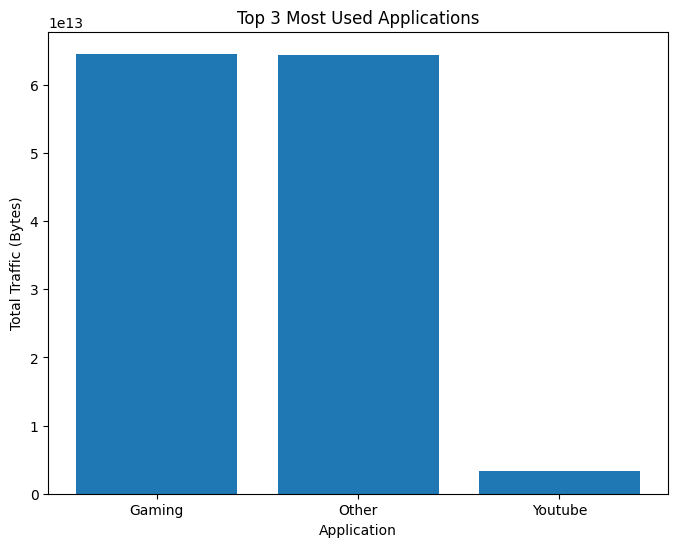

In [87]:
import matplotlib.pyplot as plt

# Plot the top 3 most used applications by total traffic
top_3_applications = application_traffic_df.sort_values(by='Total Traffic (Bytes)', ascending=False).head(3)
plt.figure(figsize=(8, 6))
plt.bar(top_3_applications['Application'], top_3_applications['Total Traffic (Bytes)'])
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Top 3 Most Used Applications')
plt.show()

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the normalized data for elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)


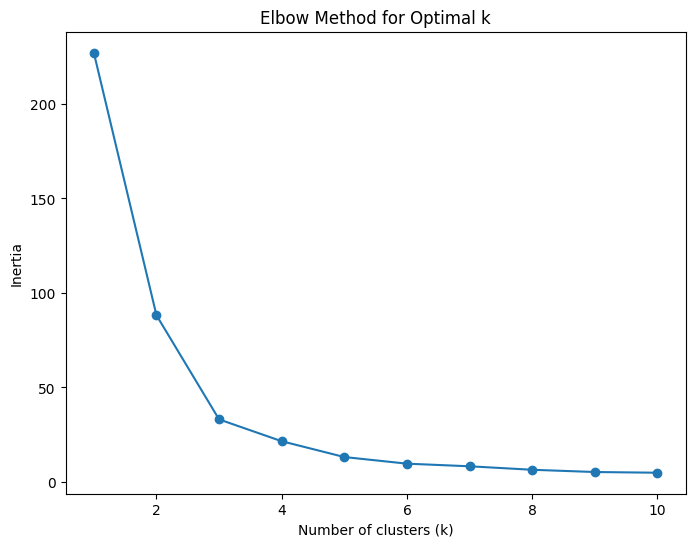

In [89]:
# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()